In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loss Functions

There are many type of loss functions but they can be mainly classified into 2 types:

- Regression Loss Functions ( for Contiuous loss values)
 - Mean Square error - $\frac{1}{n}$$\sum$($y$-$\bar{y}$)$^2$ : this is the formula of Mean square error
 - Mean Squared error Logarithmic loss - $\frac{1}{n}$$\sum$($log{(y + 1)}$ - $log{(\bar{y} + 1)}$)
 - Mean Absolute error
 

# Live Object Detection

# Different Topics
 - Normalisation -  changing the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
  
  $\huge {\frac{\bar{Y} - \mu}{\sigma} }$

 - Batch Normalisation - 
  - Applying Normalization after every layer and then scaling the outputs by 2 new parameters.
  - BN calculates the batch statistics(Mini-batch mean and variance) in every training iteration, therefore it requires larger batch sizes while training so that it can effectively approximate the population mean and variance from the mini-batch. 
  -  This makes BN harder to train networks for application such as object detection, semantic segmentation, etc because they generally work with high input resolution(often as big as 1024x 2048) and training with larger batch sizes is not computationally feasible.



$Z_{norm}$= $\huge {\frac{\bar{Z} - \mu}{\sigma + \epsilon} }$

$Z_{final}$ = $Z_{norm}\gamma + \beta$

where $\gamma$ and $\beta $ are 2 more hyper parameters and $\epsilon$ is a small quantity to avoid division by $0$

    


 - Layer Normalisation - Inspired by the results of Batch Normalization, Geoffrey Hinton et al. proposed Layer Normalization which normalizes the activations along the feature direction instead of mini-batch direction. This overcomes the cons of BN by removing the dependency on batches and makes it easier to apply for RNNs as well.

 - Dropout Regularization 
  - In many cases the model tends to overfit. To avoid this we implement the Dropout Regularization. 
  - In this we keep a certain probability known as $\textbf{keep_prob} = P$ for a particular layer. this is the probability with which will we will still keep a node in that layer or remove it with a probability $1-P$ before an epoch. This helps prevent overfitting 
   - Training Phase: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction $1-P$ of nodes (and corresponding activations).
  - Testing Phase - Use all activations, but reduce them by a probability $1-P$ (to account for the missing activations during training).

 - Activation Functions 
  - Sigmoid Function - 
     - $\huge g(z) = \frac{1}{1+e^{-z}} $
  - Hyperbolic Tangent - 
     - $\huge g(z) = \frac{e^{z}- e^{-z}}{e^{z}+ e^{-z}}$
  - Relu Function - 
     - $\huge g(z)$ = \begin{cases} 
     0 & z\leq 0 \\ 
     z & z > 0\\
   \end{cases}
   - Leaky Relu 
    - $\huge g(z)$ = \begin{cases} 
     az & z\leq 0 \\ 
     z & z > 0\\
   \end{cases}
where $a > 0$

 - Softmax Activation 
  - $\huge g(\vec{z})_i = \frac{e^{z_i}}{\sum_i{e^{z_i}}} $
  (used for classification)

- Pooling Layer 
  - The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter.
  -  For a feature map having dimensions $n_h$ x $n_w$ x $nc$, the dimensions of output obtained after a pooling layer is => $\frac{(n_h - f + 1)}{s}$ x $\frac{(n_w - f + 1)}{s}$ x $nc$
  - There are 2 types of pooling :-
    - Maxpool - The Maximum of the number over which the filter is placed is taken.
    - Average Pool - The Average of the number over which the filter is placed is taken.

- Convolutions - Idk How to describe Convolution in words
  - 1D CNNs are used on audio and text data since we can also represent the sound and texts as a time series data.
  -  1D CNN can perform activity recognition task from accelerometer data, such as if the person is standing, walking, jumping This data has 2 dimensions. The first dimension is time-steps and other is the values of the acceleration in 3 axes.

 - Skip Connections - 
  - They're essentially connections from early layers to later layers through addition or straight up concatenation.
   - The intuition behind this type of skip connection is that they have uninterrupted gradient flow from the first layer to the last layer, which tackles the vanishing gradient problem


# CNN Architechture (MNIST Dataset)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import torch 
import torch.nn as nn
from torch.utils.data import DataLoader


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
mnist_train = pd.read_csv('MNIST\mnist_train.csv')
mnist_test = pd.read_csv('MNIST\mnist_test.csv')

In [5]:
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# From the documentation (for my reference)

At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset, with support for
 - map-style and iterable-style datasets,

 - customizing data loading order,

 - automatic batching,

 - single- and multi-process data loading,

 - automatic memory pinning
 
 These options are configured by the constructor arguments of a DataLoader, which has signature:
 DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)
           
The most important argument of the constructor is dataset and there are 2 types:- 
 - Map-style datasets - A map-style dataset is one that implements the __getitem__() and __len__() protocols, and represents a map from (possibly non-integral) indices/keys to data samples. For example, such a dataset, when accessed with dataset[idx], could read the idx-th image and its corresponding label from a folder on the disk.
 - Iterable - style datasets - An iterable-style dataset is an instance of a subclass of IterableDataset that implements the __iter__() protocol, and represents an iterable over data samples. This type of datasets is particularly suitable for cases where random reads are expensive or even improbable, and where the batch size depends on the fetched data. For example, such a dataset, when called iter(dataset), could return a stream of data reading from a database, a remote server, or even logs generated in real time.
           
 
There are 2 process Multi process data loading and single process data loading.

For data loading, passing pin_memory=True to a DataLoader will automatically put the fetched data Tensors in pinned memory, and thus enables faster data transfer to CUDA-enabled GPUs.


I will be using the class features instead of manually splitting the data into batched

In [6]:
#using map-style
class Dataset(torch.utils.data.Dataset):
    def __init__(self, images, targets):
        self.targets = targets #labels
        self.images = images.unsqueeze(1)/255
        
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, i):
        x = self.images[i]
        
        return x, self.targets[i]
    
    

In [7]:
#Extracting the data
#we will use random.split for getting train and validation sets

def extract_data(subset):
    df = subset.dataset.iloc[subset.indices]
    y = torch.from_numpy(df.pop('label').to_numpy()).to(torch.float)
    x = torch.from_numpy(df.to_numpy().reshape(-1,28,28)).to(torch.float)
    return (x, y)

def split_data(df):
    length_val = len(df)//6
    train, val = torch.utils.data.random_split(df, [len(df)-length_val, length_val])
    return extract_data(train), extract_data(val)



In [8]:
(x_train, y_train), (x_val, y_val) = split_data(mnist_train)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

torch.Size([50000, 28, 28]) torch.Size([50000])
torch.Size([10000, 28, 28]) torch.Size([10000])


In [9]:
y_test = torch.from_numpy(mnist_test.pop('label').to_numpy()).to(torch.float)
x_test = torch.from_numpy(mnist_test.to_numpy().reshape(-1,28,28)).to(torch.float)

In [10]:
mnist_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4.0


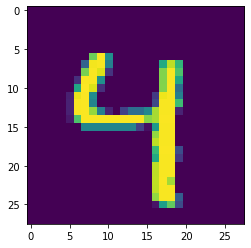

In [11]:
# plotting the images
plt.imshow(x_train[0,:,:])
print(y_train[0].item())

In [12]:
# #we can do data augmentation too but we will avoid that for now
# transforms = torch.nn.Sequential(
#     # without this "deprecated" resample scripted_transforms crashes in this kernel. Should be removed in the newer versions
#     thv.transforms.RandomRotation(10, resample=0),
#     thv.transforms.GaussianBlur(3, sigma=(0.0001, 0.3)),
# )

# # This will speed up transformation
# scripted_transforms = torch.jit.script(transforms)

In [13]:
train_set = Dataset(x_train, y_train)
val_set = Dataset(x_val, y_val)


In [14]:
#creating dataloaders
train_loader = DataLoader(train_set, batch_size = 256, shuffle = False)
val_loader = DataLoader(val_set, batch_size = 256, shuffle = False)

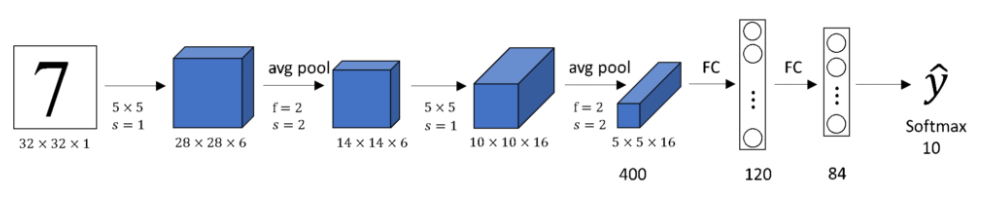

In [28]:
#### Following Lenet5 architechture for this with batch layernorm after every 

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels = 6, kernel_size = (2,2), stride = 2),
                                   nn.BatchNorm2d(num_features = 6), 
                                   nn.ReLU(),
                                   nn.AvgPool2d(kernel_size=(2,2))
                                  )
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=6, out_channels=16, kernel_size =(3,3)),
                                    nn.BatchNorm2d(num_features = 16),
                                    nn.ReLU(),
                                    nn.AvgPool2d(kernel_size=(2,2))
                                   )
        self.fc = nn.Sequential(nn.Linear(in_features=16*5*5, out_features=120),
                                nn.BatchNorm1d(num_features=120),
                                nn.ReLU(),
                                nn.Linear(in_features=120, out_features=90),
                                nn.BatchNorm1d(num_features=90),
                                nn.ReLU(), 
                                nn.Linear(in_features=90, out_features=10),
                               )
        def forward(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = self.fc(x)
            return x

model = LeNet().to(device)

In [29]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, verbose = True)

#torch.optim.lr_scheduler.ReduceLROnPlateau allows dynamic learning rate reducing based on some validation measurements.

In [30]:
def accuracy(y_preds, y):
    count = 0
    for i,pred in enumerate(y_preds):
        if y[i] == pred:
            count += 1
    return count/len(y)

def train_model(model, loss, opt, scheduler, num_epochs):
    loss_hist = {'train': [], 'val':[]}
    acc_hist = {'train': [], 'val':[]}
    
    for epoch in range(num_epochs):
        loss_train = []
        loss_val = []
        acc = []
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            opt.zero_grad()
            with torch.set_grad_enabled(True):
                preds = model(X)
                loss_value = loss(preds, Y)
                loss_train.append(loss_value.item())
                loss_value.backward()
                opt.step()
            acc.append(accuracy(preds, Y))
        
        for X,Y in val_loader:
            X = X.to(device)
            Y = Y.to(device)
            with torch.set_grad_enabled(False):
                preds = model(X)
                loss_value(preds, Y)
                loss_val.append(loss_value.item())
                
        loss_train = np.array(loss_train).mean()
        loss_val = np.array(loss_val).mean()
        acc = np.array(acc).mean()
        print(f'Epoch {epoch}: Training loss: {loss_train}, Val Loss: {loss_val}, Accuracy = {acc}')
            
        

In [31]:
train_model(model, loss, opt, scheduler, 300)

NotImplementedError: 